<a href="https://colab.research.google.com/github/ulkster/MIT-Course/blob/main/FDS_Ulkucu_FullCode__V2___without_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Foundations/Week 2/foodhub_order.csv')
# returns the first & final 5 rows
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape  # returns the (rows, columns) of the dataframe that we've read in with the name "df"

(1898, 9)



```
# This is formatted as code
```

#### Observations:  (I'm *italicizing* my points so they stand out)


*   *Nearly 2000 rows of entries*

*   *9 columns that have various types (some are names, some are words)*
*   *Since order_id is unique for each row, it might be redundant with the index... perhaps assign order_id --> index at a later time?*
*   *There are some "Not given" values for 'rating'... Those should be converted to null*
*   *In line 1893, Chipotle's value for its name includes a delivery fee... probably should be addressed*
*   *Likely assumptions: Cost=$, Rating=out of 5, Prep & Delivery time=min*
*   *The actual day is not captured, only weekday vs. weekend*




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   *We have int, object & float*

*   *9 columns that have various types (some are names, some are words)*
*   *order_id may be unique, it might be redundant with the index... perhaps assign order_id --> index?*
*   *'rating' is an object instead of an int*


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()   # This initial count shows that every column is full (no technically missing values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# (cont'd since "Not given" in the 'rating' column needs to change to null so it can be tallied properly)

# replace "not given" in rating to null (np.nan) & updating the DataFrame so it's not temporary (inplace=True)
df['rating'].replace('Not given', np.nan, inplace=True)

# count the nulls after the replacements
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [ ]:
# convert rating to float instead of int since there are non-finites (which int cannot handle)
df['rating'] = df['rating'].astype(float)
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                   float64
food_preparation_time      int64
delivery_time              int64
dtype: object

In [ ]:
# check to see if any other columns have "Not given"
print('order_id = "Not given": ', (df['order_id'] == 'Not given').sum())
print('customer_id = "Not given": ', (df['customer_id'] == 'Not given').sum())
print('restaurant_name = "Not given": ', (df['restaurant_name'] == 'Not given').sum())
print('cuisine_type = "Not given": ', (df['cuisine_type'] == 'Not given').sum())
print('cost_of_the_order = "Not given": ', (df['cost_of_the_order'] == 'Not given').sum())
print('day_of_the_week = "Not given": ', (df['day_of_the_week'] == 'Not given').sum())
print('rating = "Not given": ', (df['rating'] == 'Not given').sum())    # we already know this, but just making sure
print('food_preparation_time = "Not given": ', (df['food_preparation_time'] == 'Not given').sum())
print('delivery_time = "Not given": ', (df['delivery_time'] == 'Not given').sum())


order_id = "Not given":  0
customer_id = "Not given":  0
restaurant_name = "Not given":  0
cuisine_type = "Not given":  0
cost_of_the_order = "Not given":  0
day_of_the_week = "Not given":  0
rating = "Not given":  0
food_preparation_time = "Not given":  0
delivery_time = "Not given":  0


#### Observations:

*   *There are not technically any missing (null) values to begin with*

*   *But 'rating' has mutliple entries of "Not given", which would/should count as a null/missing value... that needs to be fixed*
*   *I also checked the other columns to see if that same "Not given" phrase was used.  Hopefully, there's not another way missing values were inputted into the data file.*


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Some Basic Stats for Food Preparation Time
print('Time it takes to Prepare food.')
print('Minimum: ', df['food_preparation_time'].min(), 'minutes')
print('Average: ', round(df['food_preparation_time'].mean(), 2), 'minutes')
print('Maximum: ', df['food_preparation_time'].max(), 'minutes')

Time it takes to Prepare food.
Minimum:  20 minutes
Average:  27.37 minutes
Maximum:  35 minutes


#### Observations:

*   *The average is almost exactly in the middle between the min & max (which would be (35+20)/2 = 27.5*

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# The % allows you to call the value into the string so the printout will update dynamically
# And the i after % means that it'll be an integer
print('There are %i missing values in the Rating column.' % (df['rating'].isnull()).sum())

There are 736 missing values in the Rating column.


#### Observations:

*   *There were many entries (736) that had "Not given" as the rating, which was stored as an object.  So I replaced that string with nulls, converted to float (since int cannot handle non-finite) then ran a count.*

*   *I also did **not** replace those empty ratings since that is more than the current rating mode (which only has about 500 entries).  If there were fewer missing ratings, I would be more comfortable filling them in.*


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Count how many unique values are in each column

for col in df.columns:
  unique_values = df[col].unique()
  print(f"Column '{col}' has {len(unique_values)} unique values.")

Column 'order_id' has 1898 unique values.
Column 'customer_id' has 1200 unique values.
Column 'restaurant_name' has 178 unique values.
Column 'cuisine_type' has 14 unique values.
Column 'cost_of_the_order' has 312 unique values.
Column 'day_of_the_week' has 2 unique values.
Column 'rating' has 4 unique values.
Column 'food_preparation_time' has 16 unique values.
Column 'delivery_time' has 19 unique values.


**INITIAL OBSERVATIONS**

*   *Since **order_id** is unique to each row, there's no obvious value in plotting/analyzing its distribution*

*   *customer_id **bold text** is also not practical plotting a distribution of 1200 unique values that don't have any inherent meaning, especially since the focus of FoodHub is to look at the demand for restaurants... not how much a single customer is ordering overall*
*   *There are 178 **different restaurants** (hopefully, although there might be repeats with different spellings/capitalizations that show as unique).  This might make it a bit challenging to compare the restaurants concisely.*

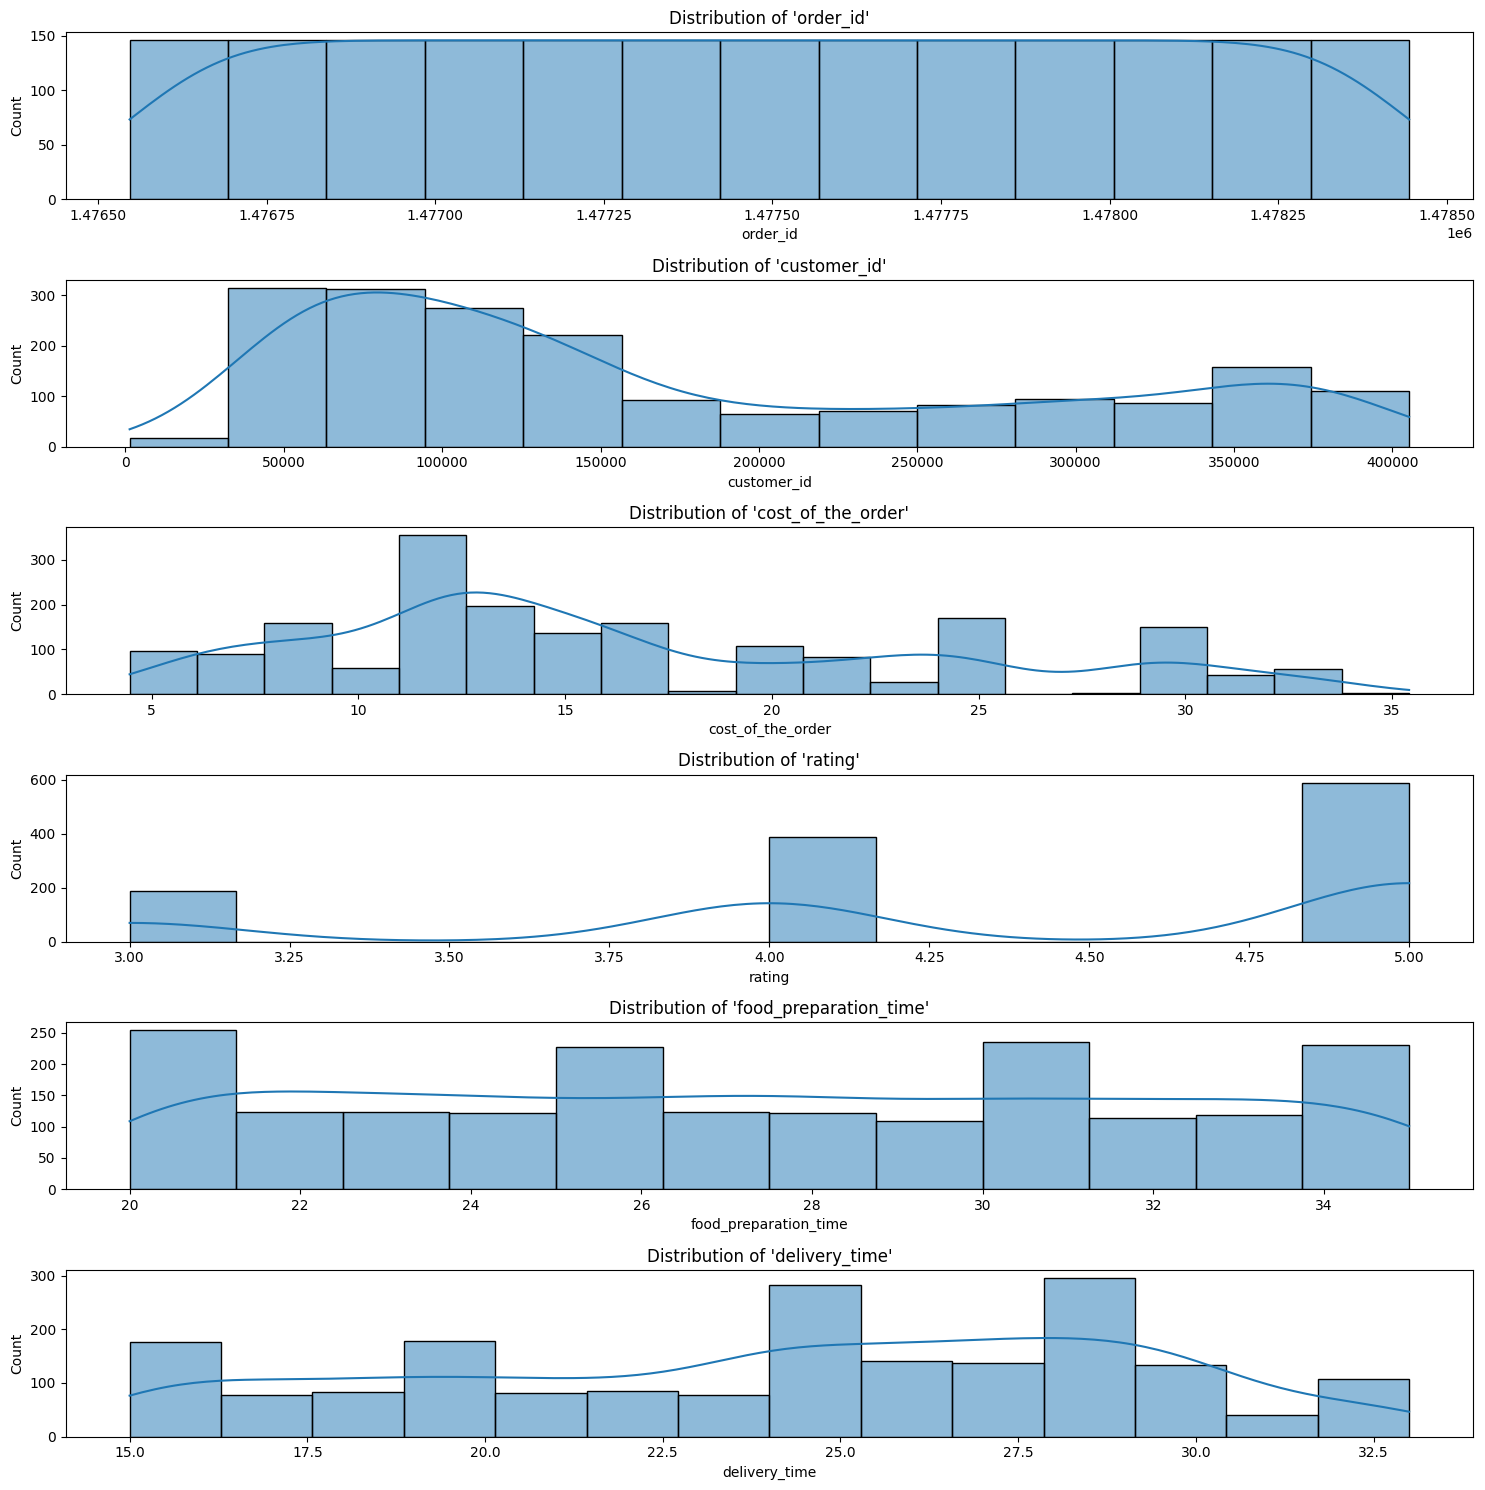

In [ ]:
# Histograms first for only Numeric Data

# Get list of numeric columns
numeric_columns = df.select_dtypes(include=["int", "float"]).columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(15, 15))

# Plot histograms with KDE for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of '{col}'")

# Adjust spacing and show plot
plt.tight_layout()
plt.show()


**Observations on Numerical Variable Distributions**

*   *Since **order_id** is unique, the histogram is expectedly **uniformly distributed**.*

*   *Although **customer_id** is not the focus for this project scope, the bimodal shape to its distribution (and if we can assume that these ID's are created sequentially & not randomly generated) could suggest that more people ordered multiple times early on in time that this data was collected... then a significant dropoff in orders per customer in the middle, then a little tick up in how much each customer was ordering.  But this interpretation only makes sense if the **order_id**'s are consecutive (like a deli counter) and not random.*
*   *The **cost per order** is essentially **skewed right**, with an order more often costing somewhere between \$10-$16 each.*
*   *Most people give a **rating** of 5, with the only other ratings being chosen being 3 (about 200 of them) and 4 (about 400).*
*   *It's interesting that for **food_preparation_time**, it usually takes either about 20 min, 26 min, 20 min, or 34 min (similar heights/frequency for each).  The rest of the times all have similarly lower frequencies of around 100 orders each taking those amounts of time to prepare.*
*   *The **delivery_time** is **skewed left** with most orders taking around 25-30 min to deliver.  It's interesting to see two common times of about 15 min & 20 min, then two more common timese at around 25 min & 28 min.  This could hint that customers are more densely populated in four particular neighborhoods (two somewhat near & two somewhat farther away).  It could also relate to whether orders were placed during the week or on the weekend since that could affect traffic or who's delivering (ex: drivers with weekday jobs might only deliver on the weekends and drive differently than those who deliver during the week)... which could affect delivery time.*

**NOW FOR NON-NUMERICAL (OBJECT) COLUMNS (THREE OF THOSE)**:

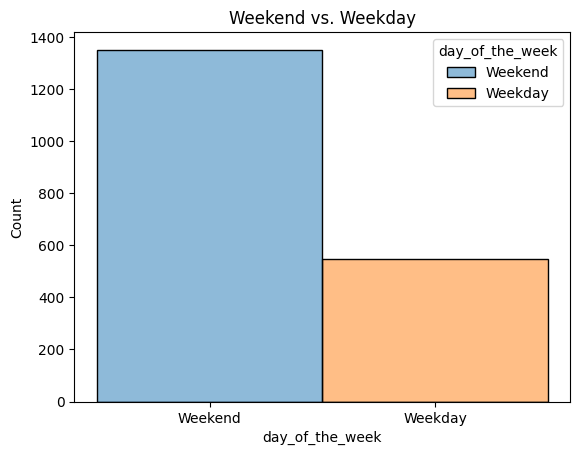

In [ ]:
# Simple two-column chart since the data for day of the week is only Weekday or Weekend

sns.histplot(data=df, x='day_of_the_week', hue='day_of_the_week');

# Display the plot
plt.title("Weekend vs. Weekday")
plt.show()

**Day of the Week Observation**:  *Obviously, the weekend is far more popular (more than twice as frequent)*

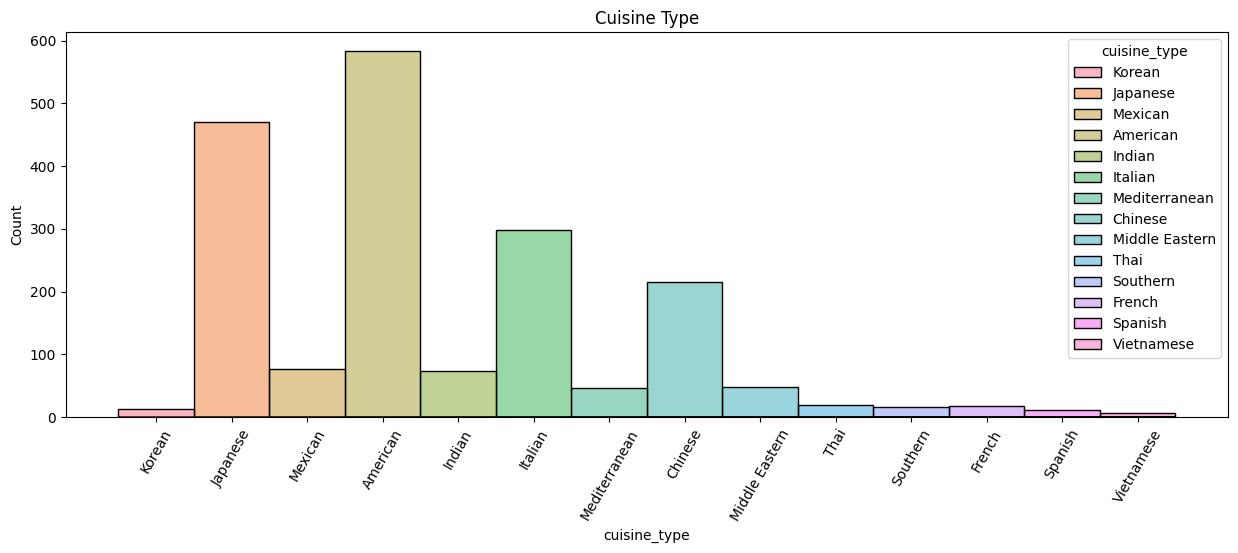

In [ ]:
#CUISINE TYPE Plot
plt.figure(figsize=(15, 5))

sns.histplot(data=df, x='cuisine_type', hue='cuisine_type');

# Display the plot
plt.title("Cuisine Type")
plt.xticks(rotation=60)
plt.show()

**Cuisine Observations**:

*   *This plot is also **right-skewed**, with American being the clear favorite.*

*   *Japanese was a relatively close second.  Italian & Chinese round out the top four.*
*   *Mexican, Indian, Mediterranean & Middle Eastern also had some orders, but the other types had very few in comparison.*

In [ ]:
# RESTAURANT NAMES - Cleaning up some of their values since there were non-standard
# characters in the data

# Chipotle had a delivery fee in its name
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: 'Chipotle Mexican Grill' if 'Chipotle Mexican Grill $1.99 Delivery' in x else x)

# These four had other characters in their names
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: 'Big Wong Restaurant' if x == 'Big Wong Restaurant _¤¾Ñ¼' else x)
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: 'Joe\'s Shanghai' if x == 'Joe\'s Shanghai _Àü£¾÷´' else x)
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: 'Cafe China' if x == 'CafÌ© China' else x)
df['restaurant_name'] = df['restaurant_name'].apply(lambda x: 'Despana' if x == 'DespaÌ±a' else x)


**EXPLANATION for Histograms**:  *Since there are 178 restaurant names (some seem like they might be duplicates upon first glance (like "Blue Ribbon Sushi" vs. "Blue Ribbon Sushi Bar & Grill"... but they have different results when searching online, so they should not be merged), I divided them into three groups of 50 (3x50 = 150) then a final chart for the remaining (178-150) 28 restaurants.  Also, 178 is a product of two primes (2 & 89), so it doesn't divide nicely into a more concise organization, hence the manual divisions into histograms.*

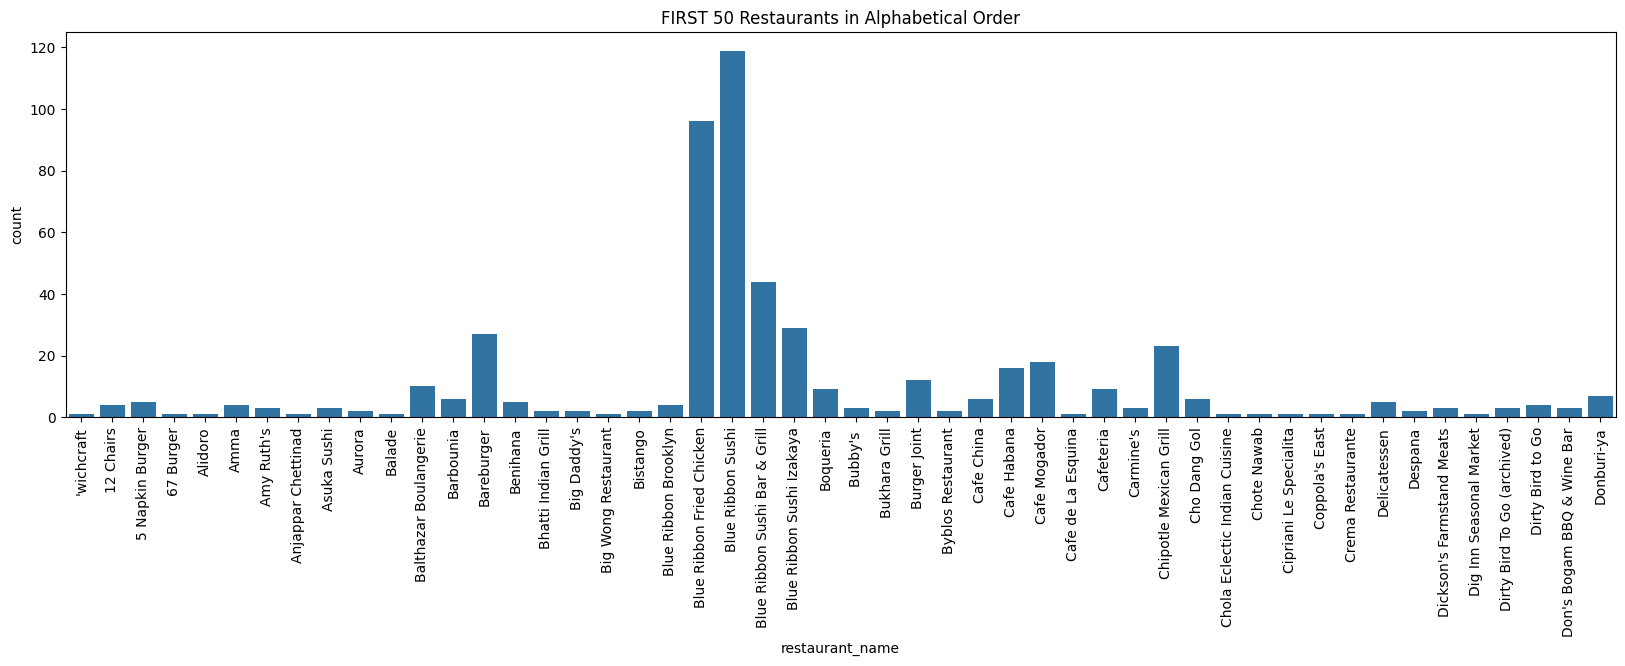

In [ ]:
# Alphabetizing the Restaurants
# I made this list since there are restaurants that seem to be part of a chain but have
# different versions (ex: Blue Ribbon has Fried Chicken, Sushi, etc.).  And it
# helped to alphabetize them to ensure the breakdown of histograms contained
# all the restaurants without repetition.

# Make a variable for the alphabetized list of restaurants
sorted_restaurants = sorted(df['restaurant_name'].unique())   # Using the .unique() makes sure the list doesn't show repeats

# Sets a large enough plot size for the upcoming data since we're plotting 50
# restaurants at a time
plt.figure(figsize=(20, 5))   # figsize(width, height)

# Get the first 50 sorted restaurants
first_50_restaurants = sorted_restaurants[:50]  # up until row 49, inclusive

# Create a countplot of the first 50 restaurants
sns.countplot(x=df['restaurant_name'], order=first_50_restaurants)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and show the plot
plt.title('FIRST 50 Restaurants in Alphabetical Order')
plt.show()


**FIRST 50 Observations -- ALPHABETICAL**:

*   *It's pretty close to being normally distributed in this alphabetical order.  But the shape is irrelevant since this is categorical & not numerical variable.*

*   *What is worth noting, however, is that the Blue Ribbon group (aside from the Brooklyn location) is quite popular.  The Fried Chicken & Sushi places, in particular, have far more orders than the rest of the group (~100 & 120 orders each, respectively).*
*   *There are some restaurants ranging between 15-40 orders, while the remaining places in this first group have very few orders.*

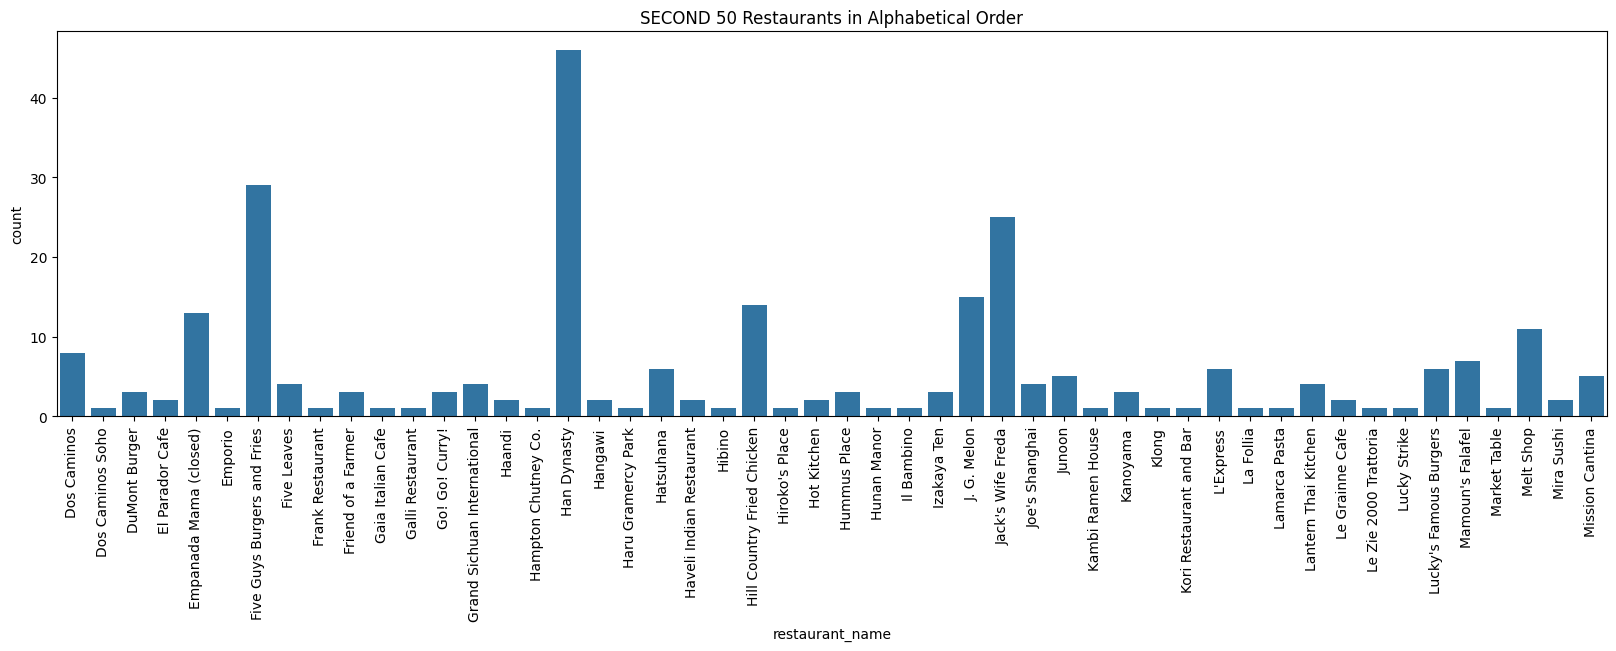

In [ ]:
# Same thing for the SECOND 50 restaurants in alhpabetical order

plt.figure(figsize=(20, 5))

# Get the second 50 sorted restaurants
second_50_restaurants = sorted_restaurants[50:100]    # start @ row 50 (inclusive) to row 100 (exclusive)

# Create a countplot of the second 50 restaurants
sns.countplot(x=df['restaurant_name'], order=second_50_restaurants)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and show the plot
plt.title('SECOND 50 Restaurants in Alphabetical Order')
plt.show()


**SECOND 50 Observations -- ALPHABETICAL**:

*   *In this group, Han Dynasty is the clear favorite.  But with about 45 orders, it is still only around 1/3 - 1/2 as popular as the Blue Ribbon Fried Chicken & Blue Ribbon Sushi locations from above.*

*   *There are a few others in the 15-30 orders range, with the rest having fewer than 10 orders each.*

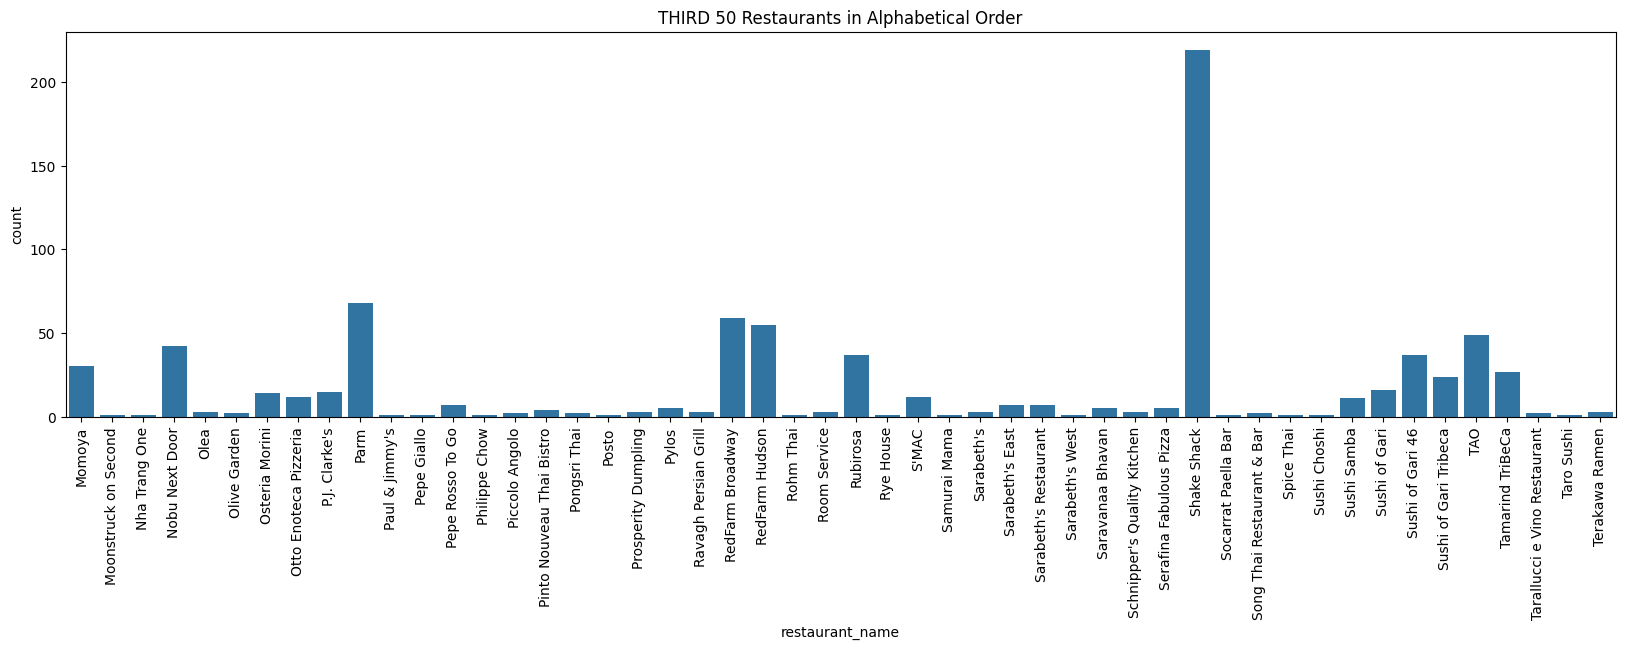

In [ ]:
# Same thing for the THIRD 50 restaurants in alhpabetical order

plt.figure(figsize=(20, 5))

# Get the third 50 sorted restaurants
third_50_restaurants = sorted_restaurants[100:150]    # include row 100 & exclude row 150

# Create a countplot of the third 50 restaurants
sns.countplot(x=df['restaurant_name'], order=third_50_restaurants)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and show the plot
plt.title('THIRD 50 Restaurants in Alphabetical Order')
plt.show()


**THIRD 50 Observations -- ALPHABETICAL**:

*   *Shake Shack has a commanding lead over all other restaurants (a bit over 200).*

*   *Some places have between 20-60 orders in this group, and the rest are quite low.*

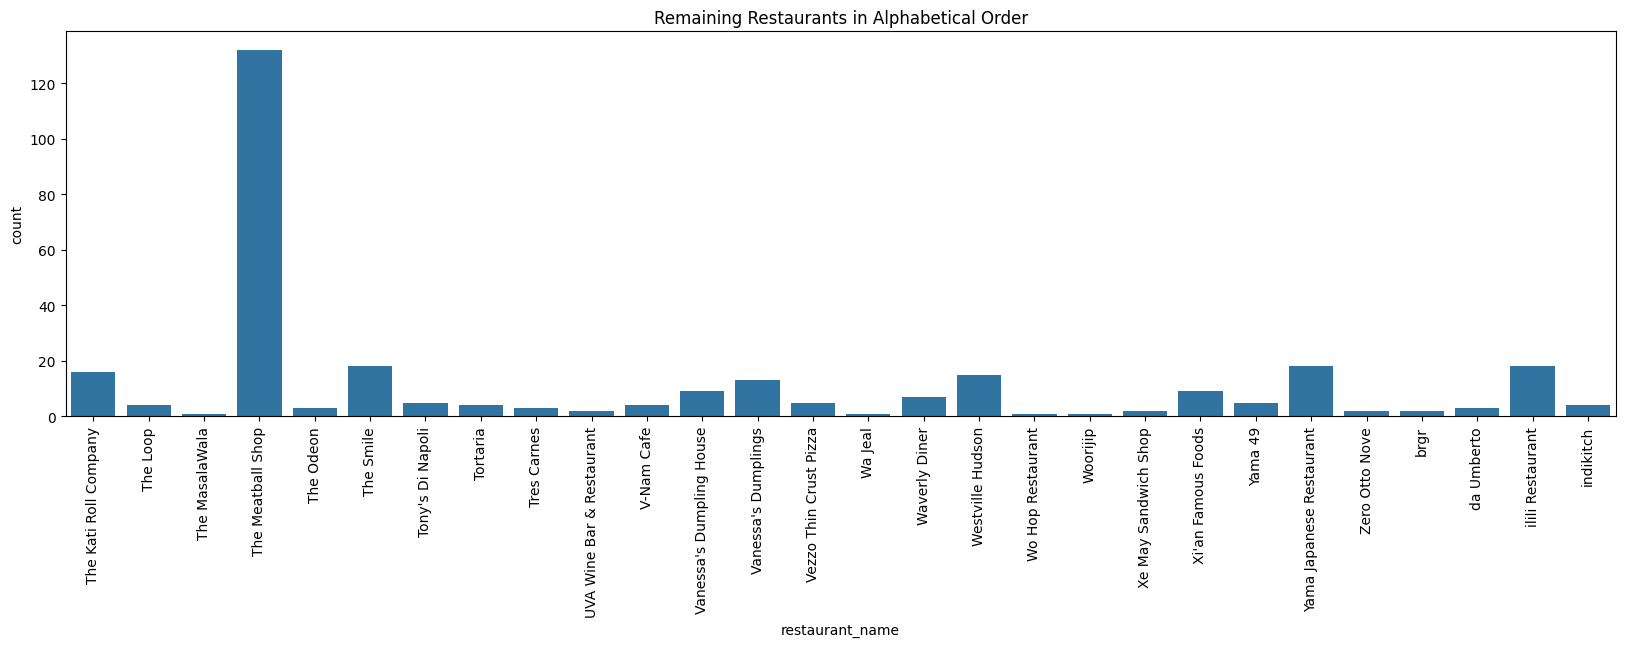

In [ ]:
# Same thing for the FINAL ("remaining") restaurants in alhpabetical order

plt.figure(figsize=(20, 5))

# Get the remaining sorted restaurants
remaining_restaurants = sorted_restaurants[150:]    # start @ row 150 until the end

# Create a countplot of the first 50 restaurants
sns.countplot(x=df['restaurant_name'], order=remaining_restaurants)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and show the plot
plt.title('Remaining Restaurants in Alphabetical Order')
plt.show()


**FINAL 28 Observations -- ALPHABETICAL**:

*   *The Meatball Shop has around 130 orders, which just edges out Blue Ribbon Sushi for second place overall (with Shake Shack being the overall favorite).*

*   *Some places in this last group have close to 20 orders, but the rest are low.*
*   *Also worth noting: restaurants with lowercase names (ex: brgr) are placed at the alphabetical end - likely from ASCII*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Printing a statement then the list
print("Top 5 restaurants in terms of the number of orders received:")
df['restaurant_name'].value_counts().head()  # head() automatically takes the Top 5

Top 5 restaurants in terms of the number of orders received:


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

*   *This list corresponds with my observations I put under the preceding histograms.*


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Make a list from the DataFrame just containing orders on the Weekend
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Identify the "popular_cuisine" as the one with the max count
popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()

# Get the actual amount of orders for that popular_cuisine
num_orders = weekend_data['cuisine_type'].value_counts()[popular_cuisine]

# Display with the type & amount
print(f"The most popular cuisine on weekends is {popular_cuisine} with {num_orders} orders.")

The most popular cuisine on weekends is American with 415 orders.


In [ ]:
# The ascending sort is set to False since we want the opposite (descending) because we're looking for higher numbers
# Then the index is 1 (which is the second item) since the first item would be index[0]
second_most_popular_cuisine = weekend_data['cuisine_type'].value_counts().sort_values(ascending=False).index[1]

# Find the difference in this count and the above count for the most popular
diff = num_orders - weekend_data['cuisine_type'].value_counts()[second_most_popular_cuisine]

print(f"The second most popular cuisine on weekends is {second_most_popular_cuisine} with {weekend_data['cuisine_type'].value_counts()[second_most_popular_cuisine]} orders, which is {diff} orders behind the most popular cuisine.")


The second most popular cuisine on weekends is Japanese with 335 orders, which is 80 orders behind the most popular cuisine.


In [ ]:
# Counting the weekday orders for American cuisine so you can compare vs. weekend later
american_weekday_orders = df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts()['American']
print(f"There are {american_weekday_orders} American orders during the week.")

There are 169 American orders during the week.


In [ ]:
# counting weekend orders for American
american_weekend_orders = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()['American']

# Again, find the difference, this time for weekend vs. weekday (American)
diff = american_weekend_orders - american_weekday_orders

print(f"There are {diff} more American orders over the weekend than during the week.")

There are 246 more American orders over the weekend than during the week.


#### Observations:

*   *I ran comparisons to the second most popular on the weekend (**Japanese** was 80 orders behind) and also to itself during the week (246 fewer orders for **American** during the week).*

*   *Customers order **American** on the weekend more than double the rate as on weekdays.*


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# "Costly" since it's over a certain price (i.e. $20)
costly_orders = df[df['cost_of_the_order'] > 20].shape[0]   # The ".shape[0]" returns the number of rows that satisfy this... making the variable an integer

total_orders = df.shape[0]   # again, the ".shape[0]" just makes the variable an integer with the count

# Multiply by 100 to find a percentage after dividing
percentage = costly_orders / total_orders * 100

# Round the resulting percentage to two decimal places
print(f"{percentage:.2f}% of the orders cost more than $20.")

29.24% of the orders cost more than $20.


#### Observations:

*   *This corroborates with the above histogram and supports my earlier claim that more orders were \$10-$16 range since less than 1/3 of the orders were over \$20.*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Finding Mean & Median, rounding both to two decimal places
print('The MEAN Delivery Time is', round(df['delivery_time'].mean(), 2), 'minutes')

print('The MEDIAN Delivery Time is', round(df['delivery_time'].median(), 2), 'minutes')

The MEAN Delivery Time is 24.16 minutes
The MEDIAN Delivery Time is 25.0 minutes


**Observation**:  *As noted in a previous observation, the mean & median are pretty close to each other.  However, since the mean is a bit less than the median, it makes sense that the data we saw in a previous histogram was relatively **skewed left**.*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the top 3 most frequent customers
top_3_customers = df['customer_id'].value_counts().head(3)

# Get the customer IDs and number of orders for each
for customer_id, count in top_3_customers.items():
  print(f"Customer ID: {customer_id}, Number of Orders: {count}")


Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


#### Observations:  *The top 3 customers made a similar amount of orders.*


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


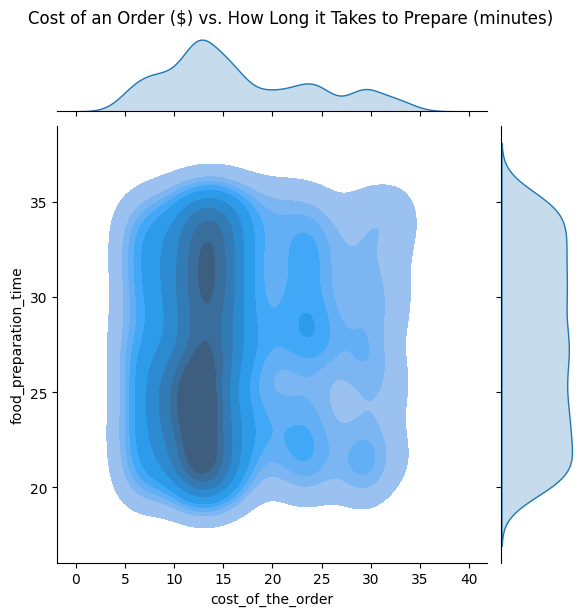

In [ ]:
# Showing a Jointplot to compare the Cost & Prep Time --> ex: are lower cost orders faster to prepare?

# Density plot (filled to see the color difference to show where more entries are gathered)
sns.jointplot(data=df, x='cost_of_the_order', y='food_preparation_time', kind='kde', fill=True)

# Make a title with "suptitle()" to control its placement
plt.suptitle('Cost of an Order ($) vs. How Long it Takes to Prepare (minutes)', y=1.02) # the 'y=1.02' moves it up so it's not covered by the graph

plt.show()

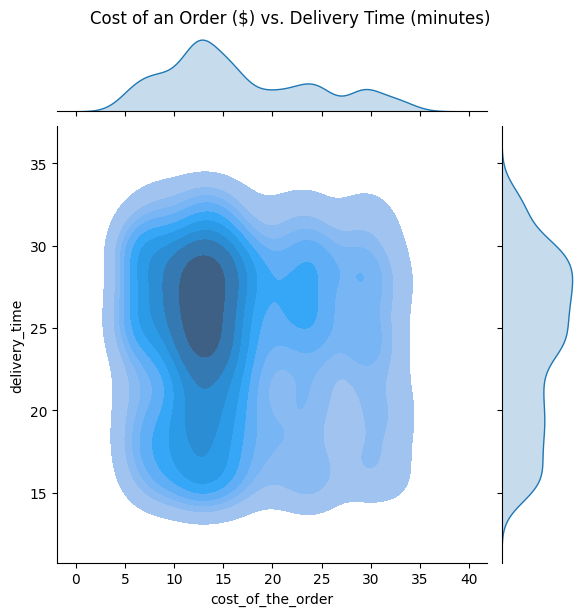

In [ ]:
# Showing a Jointplot to compare the Cost & Prep Time --> ex: are more expensive orders closer/farther away?

# Density plot (filled to see the color difference to show where more entries are gathered)
sns.jointplot(data=df, x='cost_of_the_order', y='delivery_time', kind='kde', fill=True);

# Make a title with "suptitle()" to control its placement
plt.suptitle('Cost of an Order ($) vs. Delivery Time (minutes)', y=1.02) # the 'y=1.02' moves it up so it's not covered by the graph

plt.show()

**Observations for Cost vs. Prep/Delivery Times**

*   *I was curious if **lower cost** orders affected the **prep time** since maybe the restaurant doesn't have to make as much food for a lower cost order.  However, the **prep time** is **pretty uniformly** distributed among the **order cost**.*

*   *But when comparing **cost** against **delivery time**, we do see a bit of a **right skew** to the **delivery time** data.  This could suggest that lower cost orders actually took longer (since the darkest/most dense spot is around the \$10-$15 / 25-30 min zone).  I thought maybe that people who were making a bigger (more costly) order were ordering from farther away (higher delivery time) since they didn't want to pick it up themselves.*
*   *However, this dark spot on the plot could just be the result of most deliveries taking around 25-30 min, regardless of the cost of the order.*

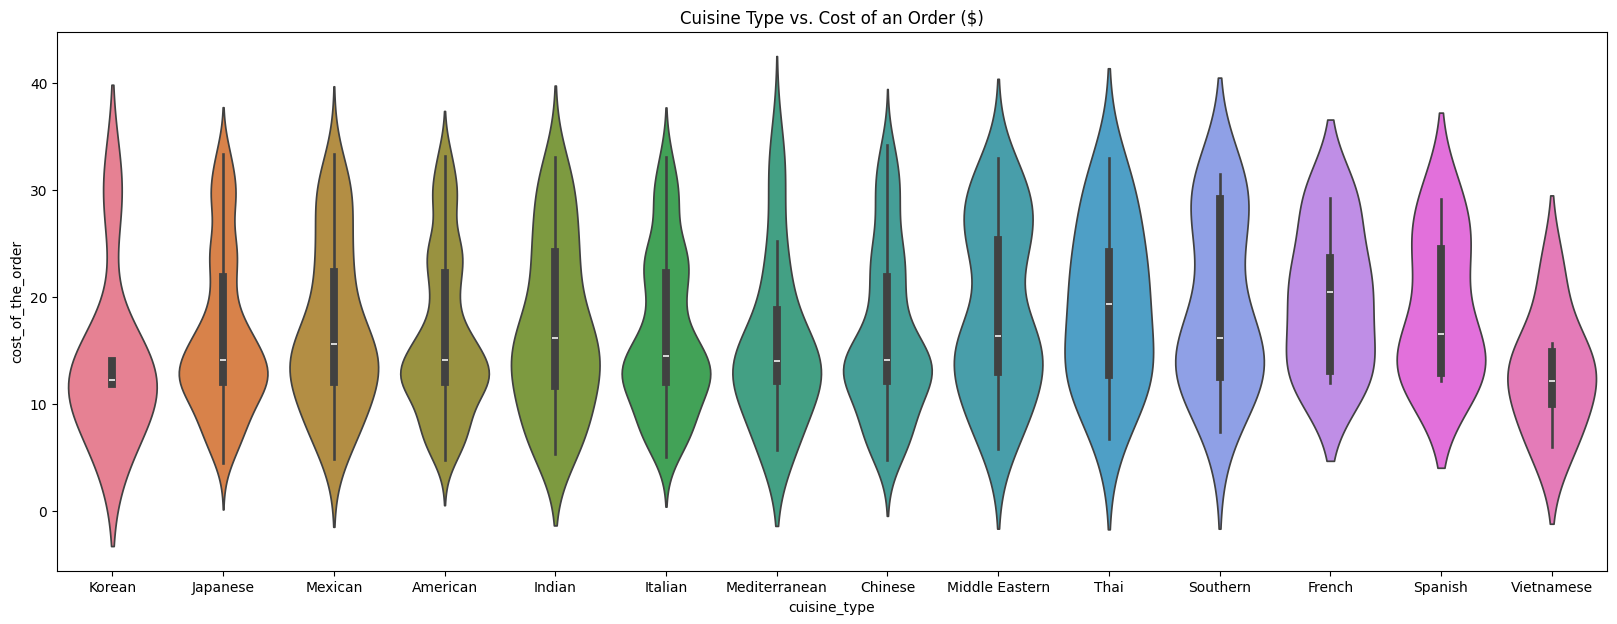

In [ ]:
# Comparing the ORDER COSTS of each CUISINE TYPE
plt.figure(figsize=(20,7))

plt.title('Cuisine Type vs. Cost of an Order ($)')

# Using a violin plot to show the distribution of order costs per cuisine type
sns.violinplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.show()

**Observations for Cuisine Type vs. Cost of an Order ($)**:

*   *I wondered if different cuisines had different cost distributions since, for example, I'd expect maybe orders of Mexican food to be less than Japanese since I would normally just order a burrito or some tacos (around $10), but I would probably only order Japanese (sushi) for a larger group.*

*   *From these violin distributions, we can see that Middle Eastern, Southern & Spanish have a small bump in the more expensive area around \$25-\$30.*
*   *Thai & French also have some more expensive orders, but they're a bit more uniformly distributed up to that $30 area (moreso than the three mentioned above).*

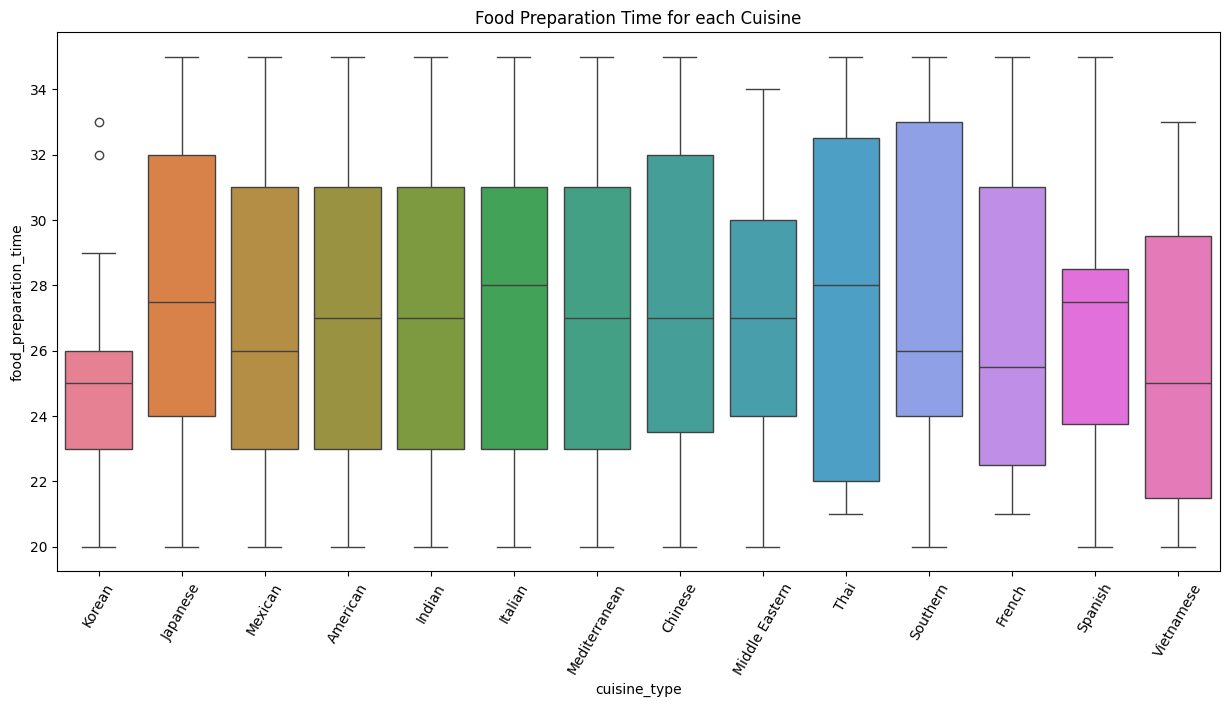

In [ ]:
# Boxplot for Food Prep Time based on Cuisine
plt.figure(figsize=(15,7))
plt.title('Food Preparation Time for each Cuisine')
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, hue='cuisine_type')

# Rotate labels to read
plt.xticks(rotation = 60)
plt.show()

**Observations on CUISINE TYPE vs. PREP TIME**:

*   *Most of the cuisines have a similar distribution in prep time:*
   * *Min @ 20 min*
   * *Max ~ 35 mi*
   * *Median ~ 27 min*
   * *Middle 50% of prep times ~ 23-31 min (roughly)*
*   *The **most closely gathered** data belongs to **Korean** (shortest whiskers & smallest box).  Plus, it's the only cuisine with outliers in its prep time distribution.*
*   *Also, **Middle Eastern** & **Spanish** have **smaller boxes** --> their middle 50% of prep times are closer together.*
*   *Then **Thai** & **French** have **higher minimums**, so it suggests that their food takes at least 21 min*
*   *For **Korean** & **Spanish**: medians significantly closer to the upper end of their boxes --> **left-skewed data**.*
*   *Finally, **Mexican**, **Southern** & **French** are more **right-skewed** since their medians are closer to the lower ends.*

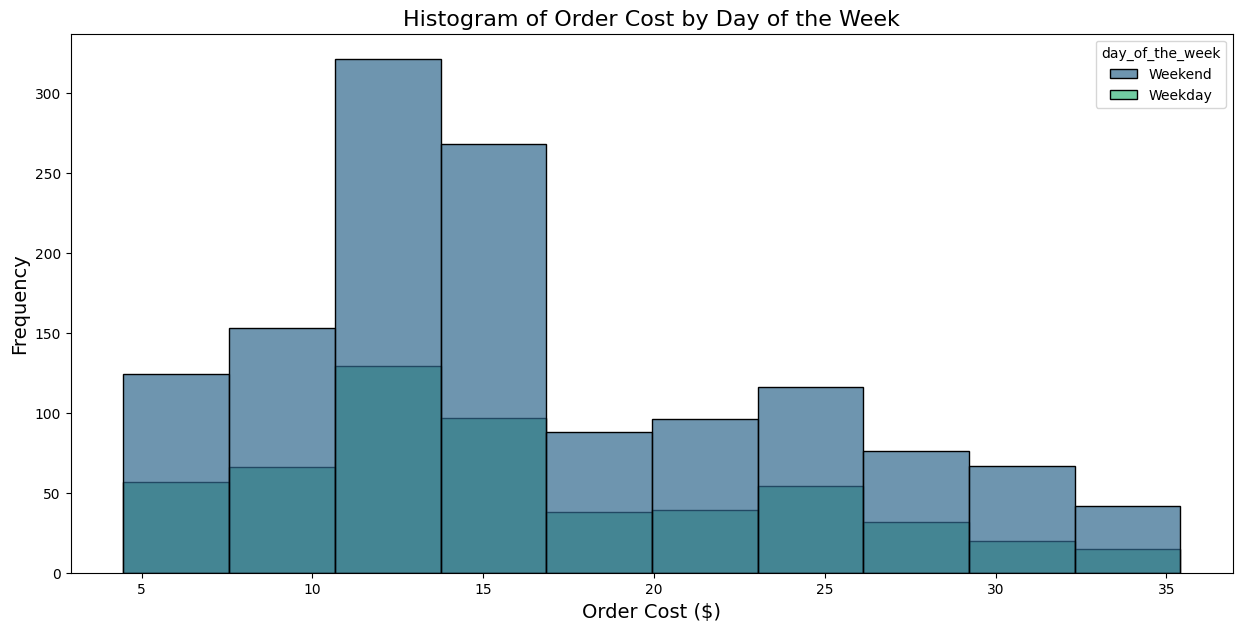

In [ ]:
# Histogram for How Often Different Levels of Orders compare betwen Weekend & Weekday based on Cost

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Plot a histogram of order cost, grouped by day of the week
sns.histplot(data=df, x='cost_of_the_order', hue='day_of_the_week', bins=10, palette='viridis', alpha=0.7, ax=ax)

# Add title and labels
ax.set_title('Histogram of Order Cost by Day of the Week', fontsize=16)
ax.set_xlabel('Order Cost ($)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


**Observations on Cost vs Weekday/Weekned**

*   *With the exception of orders costing between ~\$11-\$16 & ~\$29-$36(which are noticably more common on the weekend), there doesn't seem to be much of a difference in order cost between weekday & weekend.  I thought there might be even more data towards the higher priced orders on the weeked since you might be having people over for a get together instead of just eating for yourself during the week.*

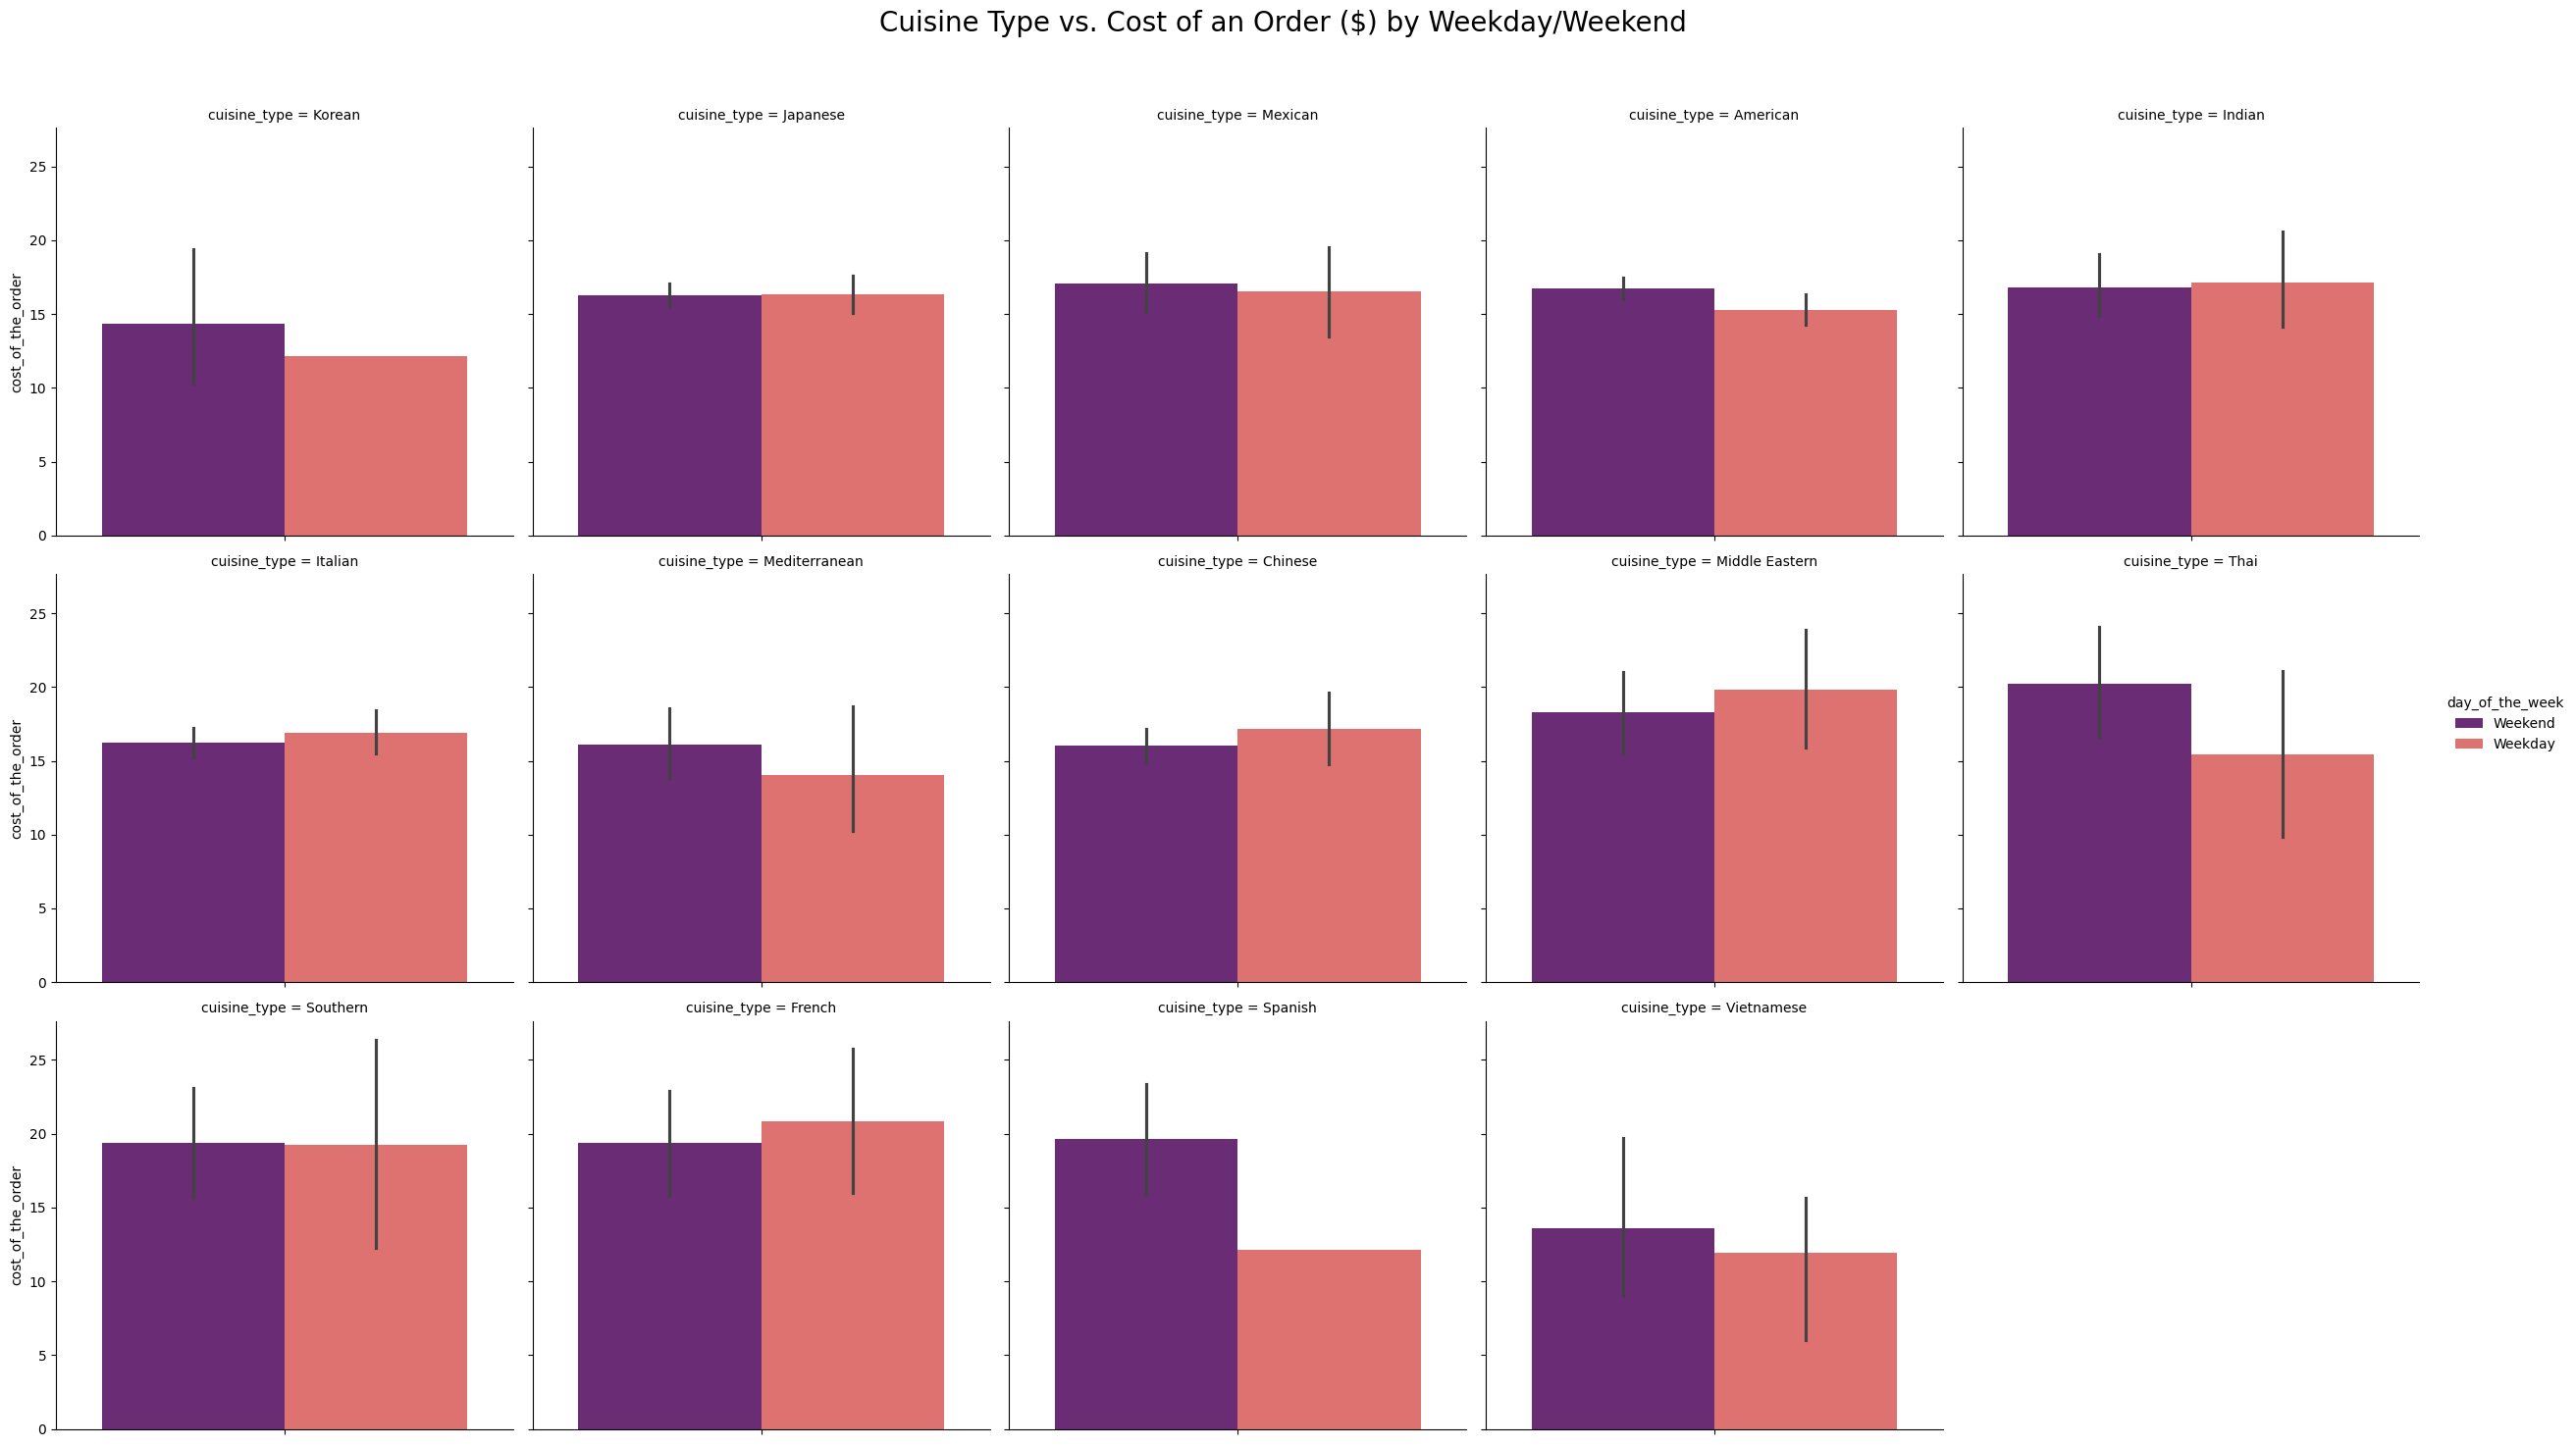

In [ ]:
# Catplot to compare the ORDER COST & DAY OF THE WEEK for each CUISINE TYPE

g=sns.catplot(
    data=df,
    y="cost_of_the_order",
    hue="day_of_the_week",  # color-coding weekday/weekend
    col="cuisine_type",     # each separate plot = cuisine type
    kind='bar',
    palette='magma',        # just trying another color palette
    col_wrap=5              # breaks the display up to make it more readable
)

# This "top=0.9" also moves the title up, but this version works in the opposite way as...
# ... the "y=1" used in the jointplot above.  In this case, lower number --> higher up
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Cuisine Type vs. Cost of an Order ($) by Weekday/Weekend', fontsize=20);

**Observations**:

*   *Thai & Spanish **bold text** have significantly **higher order costs** on the **weekend** (Korean & Mediterranean to a lesser degree).  The other cuisines have general parity in order costs throughout the full week.  I thought maybe that cuisines I would consider more expensive (ex: Japanese & French) had higher cost orders on the weekend.*

*   *I'm actually surprised that there are some cuisine types with higher cost orders during the week (ex: Chinese, Middle Eastern & French) as opposed to the weekend.  Although, their cost differences are not by much.*

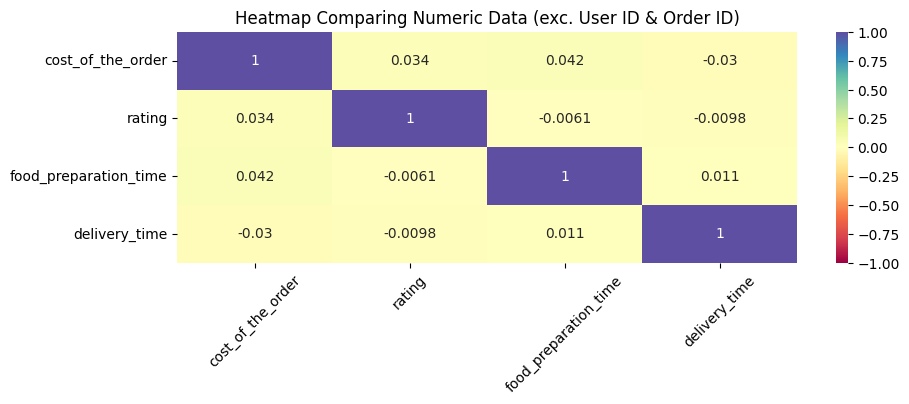

In [ ]:
# Heatmap comparing the numerical values (excluding order_id & customer_id)

# Colab AI suggested making a matrix of the specific columns since I didn't just want data.corr(numeric_only=True), which includes the id's
corr_matrix = df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr()

plt.figure(figsize=(10,3))
plt.title('Heatmap Comparing Numeric Data (exc. User ID & Order ID)')

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Spectral',
    vmin=-1,
    vmax=1)
plt.xticks(rotation = 45)
plt.show()

**Observations on Numerical Heatmap**:

*   *There is very little correlation between any of these numerical values (i.e. nothing even above 0.05).  So the above plots are likely coincidental, and my aforementioned theories don't seem to show up in the data.*

*   *For instance, I would hope that more expensive orders would be rated more highly, but the correlation (while positive) is very small.*

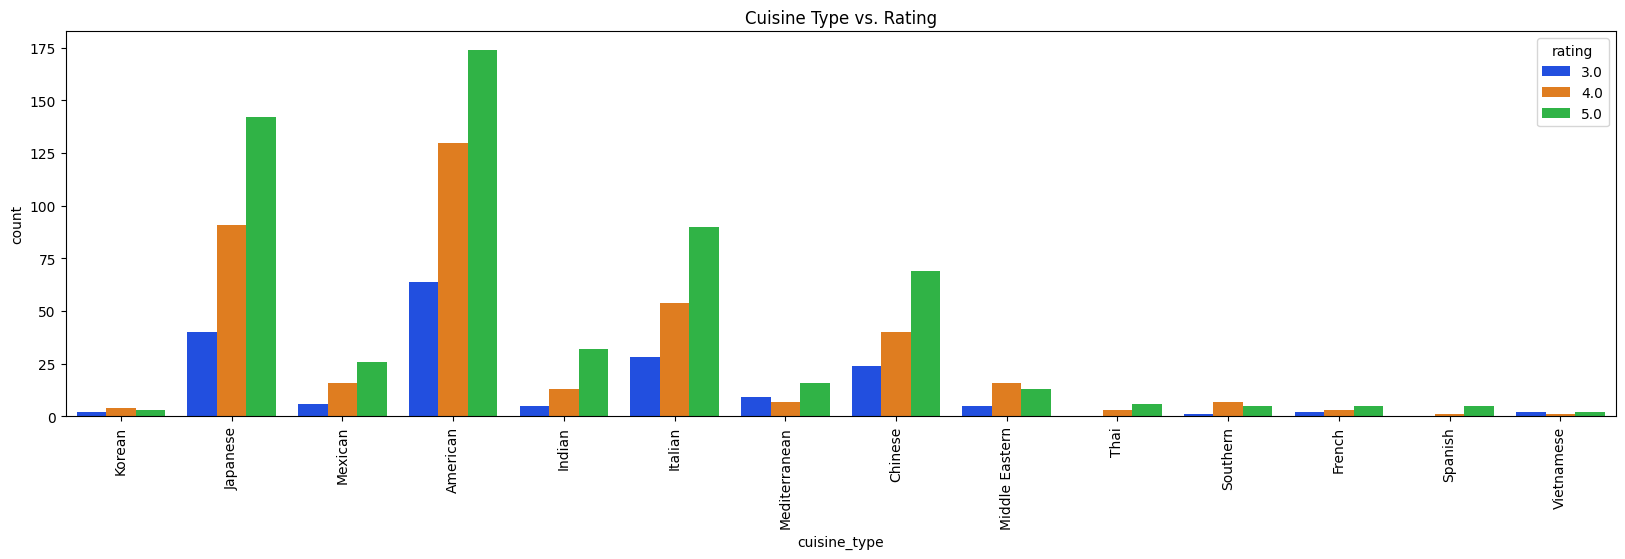

In [ ]:
# Making a Countplot to group the Ratings Frequencies in each Cuisine

plt.figure(figsize=(20,5))
# Create a countplot of the ratings for each cuisine type
sns.countplot(x='cuisine_type', hue='rating', data=df, palette='bright')  # brightened up the colors

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and show the plot
plt.title('Cuisine Type vs. Rating')
plt.show()


**Observations**:

*   *We already knew that the overall rating frequencies occurred in 3, 4, 5 (ascending order of frequency), but I wanted to check if that was true for most cuisines, too.*

*   *And with the exception of some of the less frequently ordered cuisines (Middle Eastern, Southern, etc.), that same pattern holds (i.e. rating of 3 was the least frequent & 5 was the most frequent).  I was curious if some people were especially unpleased with a particular cuisine, but that does not seem to be the case.*

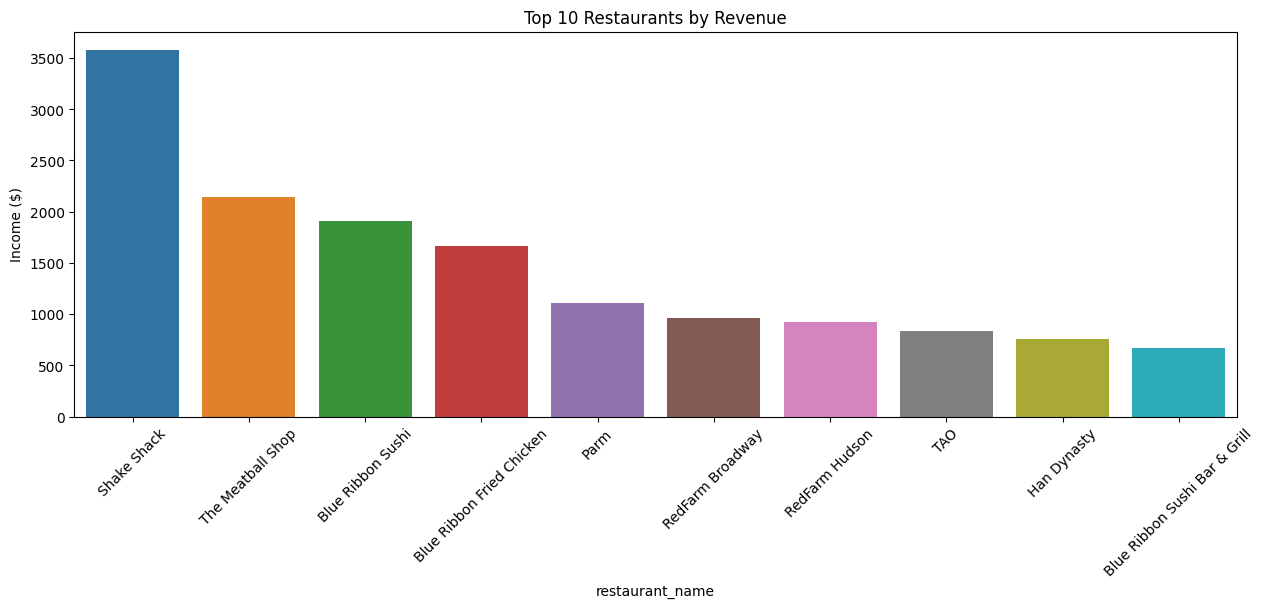

In [ ]:
# Comparing the Total Revenue for the Top 10 Earning Restaurants

# Get the top 10 restaurants by revenue
top_10_restaurants = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

# Create a bar plot of the top 10 restaurants by revenue
plt.figure(figsize=(15, 5))
sns.barplot(x=top_10_restaurants.index, y=top_10_restaurants.values, hue=top_10_restaurants.index)  # color code the bars

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and show the plot
plt.title('Top 10 Restaurants by Revenue')
plt.ylabel('Income ($)')
plt.show()


**Observations**:

*   *This might be the **most relevant** chart for the FoodHub executives since it shows the amount of money restaurants are bringing in (Top 10)*
*   *We can see that **Shake Shack** is **far ahead** of the rest of the pack by overall income from orders.*
*   *Blue Ribbon **bold text** has **several locations** in the **Top 10**.  They must be a popular franchise.*

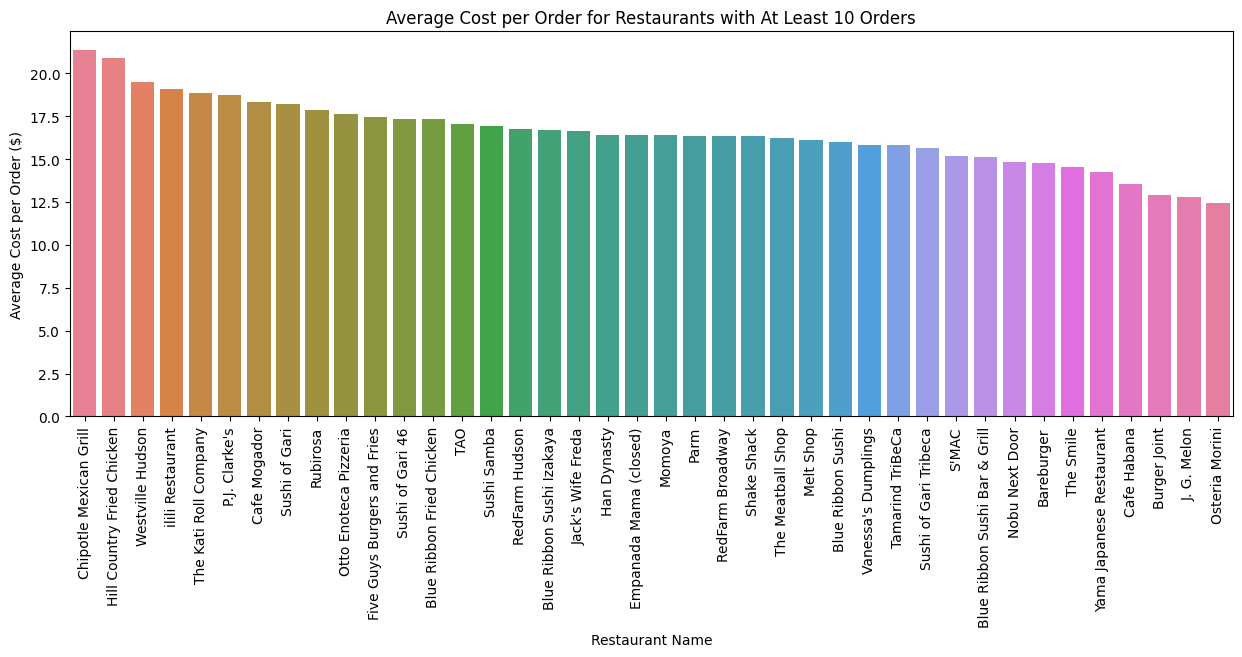

In [ ]:
# Finding Average Cost per Order (10+ Orders) by Restaurant

# Establish a variable & new DataFrame
average_cost_per_order = df.groupby('restaurant_name')['cost_of_the_order'].mean().sort_values(ascending=False)
average_cost_per_order_df = pd.DataFrame({'Restaurant Name': average_cost_per_order.index, 'Average Cost per Order': average_cost_per_order.values})
# Only use restaurants with at least 10 orders to keep it more focused
average_cost_per_order_df = average_cost_per_order_df[average_cost_per_order_df['Restaurant Name'].isin(df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts() > 10].index)]

# Create a bar chart using Matplotlib and Seaborn
plt.figure(figsize=(15, 5))
sns.barplot(x='Restaurant Name', y='Average Cost per Order', data=average_cost_per_order_df, hue='Restaurant Name')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and show the plot
plt.title('Average Cost per Order for Restaurants with At Least 10 Orders')
plt.ylabel('Average Cost per Order ($)')
plt.show()


**Observations**:   *This would also be useful for the company since it shows average order cost per restaurant (with at least ten orders to avoid restaurants that might have had a high cost order but few other orders against which to compare).*

*   *With this chart, FoodHub could decide to emphasize the higher average cost per order restaurants (like Chipotle) in advertising since people seem to tend to spend more money there per order.*

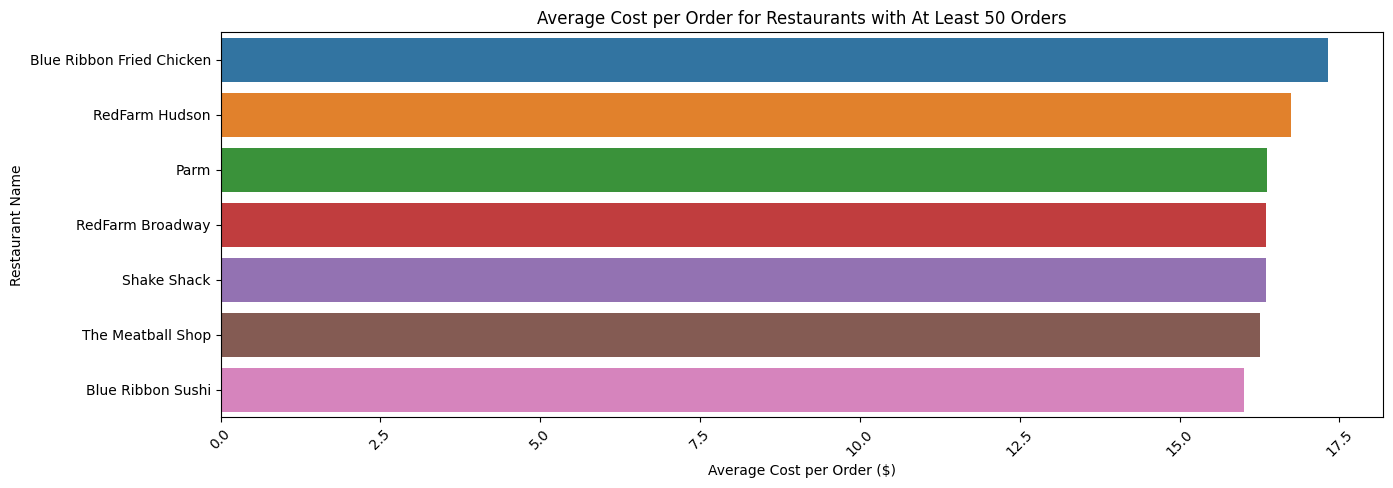

In [ ]:
# Filtering Avg Cost per Order for Restaurants with 50+ orders

average_cost_per_order = df.groupby('restaurant_name')['cost_of_the_order'].mean().sort_values(ascending=False)
average_cost_per_order_df = pd.DataFrame({'Restaurant Name': average_cost_per_order.index, 'Average Cost per Order': average_cost_per_order.values})
# Only use restaurants with at least 50 orders to keep it more focused
average_cost_per_order_df = average_cost_per_order_df[average_cost_per_order_df['Restaurant Name'].isin(df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts() > 50].index)]

# Create a bar chart using Matplotlib and Seaborn
plt.figure(figsize=(15, 5))
# Swapping the axes for a different look.  This arrangement is more practical when there are only a few names to compare so they can fit vertically on a single screen
sns.barplot(x='Average Cost per Order', y='Restaurant Name', data=average_cost_per_order_df, hue='Restaurant Name')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title and show the plot
plt.title('Average Cost per Order for Restaurants with At Least 50 Orders')
plt.xlabel('Average Cost per Order ($)')
plt.show()


**Observations**

*   *I made a second version of that only has restaurants have at least 50 orders since the next question discusses a possible promotion.*

*   *The point here is to illustrate how the Top 12 Cost per Order Restaurants (from Chipotle to Sushi of Gari 46) have fewer than 50 orders.  So it could make sense for FoodHub to further push those twelve restaurants since they have higher cost orders but don't have that many orders (so they could be earning the delivery company even more money).*
*   *Also, you can see that the average cost per order for restaurants with at least 50 orders is pretty similar (about \$16-$17 each)*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Find a list of restaurants that have at least 50 ratings w/ an avg > 4

# First, create a new dataframe with the restaurant names, average rating, and number of ratings
# I changed it to order by mean since the average rating is probably more valuable than the number of ratings.
average_rating_df = df.groupby('restaurant_name')['rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# Then, filter the dataframe to only include restaurants with at least 50 ratings and an average rating greater than 4
qualified_restaurants = average_rating_df[
    (average_rating_df['count'] > 50) & (average_rating_df['mean'] > 4)
]

# Finally, print the list of qualified restaurants
print("Restaurants fulfilling the criteria to get the promotional offer:")
for restaurant, data in qualified_restaurants.iterrows():
    print(f"- {restaurant}: average rating of {data['mean']:.2f} based on {data['count']} ratings")


Restaurants fulfilling the criteria to get the promotional offer:
- The Meatball Shop: average rating of 4.51 based on 84.0 ratings
- Blue Ribbon Fried Chicken: average rating of 4.33 based on 64.0 ratings
- Shake Shack: average rating of 4.28 based on 133.0 ratings
- Blue Ribbon Sushi: average rating of 4.22 based on 73.0 ratings


#### Observations:

*   *These restaurants are also in the middle area for average cost per order for restaurants with at least 10 orders (shown above).  One might assume that they would be closer to the top of that list.  But we saw in a previous heatmap that rating & cost per order had a very low correlation.*

*   *They are also the top four overall earners in gross revenue.  But this is also likely due (at least in part) to the fact that they have so many orders & ratings (as opposed to people ordering a lot each time, as mentioned in the previous point).*
*   *This might be a good way for restaurants like Chipotle & Hill Country to get their customers to order more through FoodHub and submit ratings since they have the highest cost per order (with at least ten orders).  So they are missing out on a potential promotion from FoodHub.*
*   *Plus from a business sense, I believe promotions are usually meant to bolster less popular options.  So offering extra advertising (or whatever they choose to do as part of the promotion) makes mores sense to help higher average cost restaurants with fewer orders (in my opinion).*


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Add 25% to all orders more than 20 dollars, add 15% to orders greater than $5 & less than $20

# Make a new column so as not to overwrite the original cost column data
df['total_cost'] = df['cost_of_the_order'].apply(lambda x: x*1.25 if x > 20 else x*1.15 if x > 5 else x).round(2)

# Look at the data (but only relevant info)
df[['restaurant_name','cost_of_the_order','total_cost']]

,restaurant_name,cost_of_the_order,total_cost
0,Hangawi,30.75,38.44
1,Blue Ribbon Sushi Izakaya,12.08,13.89
2,Cafe Habana,12.23,14.06
3,Blue Ribbon Fried Chicken,29.20,36.50
4,Dirty Bird to Go,11.59,13.33
...,...,...,...
1893,Chipotle Mexican Grill,22.31,27.89
1894,The Smile,12.18,14.01
1895,Blue Ribbon Sushi,25.22,31.52
1896,Jack's Wife Freda,12.18,14.01


In [ ]:
# Check for an expensive order (Hangawi's first entry was over $30):
cost_of_the_order = float(df.loc[df['restaurant_name'] == 'Hangawi', 'cost_of_the_order'].values[0])
total_cost = float(df.loc[df['restaurant_name'] == 'Hangawi', 'total_cost'].values[0])

x = 100 * (total_cost - cost_of_the_order) / cost_of_the_order
print(f"Percentage increase from ${cost_of_the_order} to ${total_cost} for Hangawi restaurant: {x:.2f}%")

Percentage increase from $30.75 to $38.44 for Hangawi restaurant: 25.01%


In [ ]:
# Checking the data to confirm the changes have been made on expensive orders
df.loc[(df['cost_of_the_order'] > 20), ['restaurant_name', 'cost_of_the_order', 'total_cost']]

,restaurant_name,cost_of_the_order,total_cost
0,Hangawi,30.75,38.44
3,Blue Ribbon Fried Chicken,29.20,36.50
5,Tamarind TriBeCa,25.22,31.52
12,Blue Ribbon Fried Chicken,24.30,30.38
17,Blue Ribbon Sushi Izakaya,33.03,41.29
...,...,...,...
1884,Shake Shack,31.43,39.29
1885,Shake Shack,29.05,36.31
1892,Han Dynasty,29.15,36.44
1893,Chipotle Mexican Grill,22.31,27.89


In [ ]:
# Now check an order between $5-$20:
cost_of_the_order = float(df.loc[df['restaurant_name'] == 'Cafe Habana', 'cost_of_the_order'].values[0])
total_cost = float(df.loc[df['restaurant_name'] == 'Cafe Habana', 'total_cost'].values[0])

x = 100 * (total_cost - cost_of_the_order) / cost_of_the_order
print(f"Percentage increase from ${cost_of_the_order} to ${total_cost} for Cafe Habana restaurant: {x:.2f}%")

Percentage increase from $12.23 to $14.06 for Cafe Habana restaurant: 14.96%


In [ ]:
# Quick look at those middle-priced orders
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), ['restaurant_name', 'cost_of_the_order', 'total_cost']]

,restaurant_name,cost_of_the_order,total_cost
1,Blue Ribbon Sushi Izakaya,12.08,13.89
2,Cafe Habana,12.23,14.06
4,Dirty Bird to Go,11.59,13.33
6,The Meatball Shop,6.07,6.98
7,Barbounia,5.97,6.87
...,...,...,...
1890,TAO,15.67,18.02
1891,Shake Shack,5.82,6.69
1894,The Smile,12.18,14.01
1896,Jack's Wife Freda,12.18,14.01


In [ ]:
# prompt: find a restaurant with an order under $5

df.loc[df['cost_of_the_order'] <= 5, ['restaurant_name', 'cost_of_the_order', 'total_cost']]    # I added the = to catch any orders that happened to be exactly $5 (there are none)

,restaurant_name,cost_of_the_order,total_cost
82,Shake Shack,4.75,4.75
390,Cafe Habana,4.85,4.85
480,The Loop,4.66,4.66
542,P.J. Clarke's,4.71,4.71
624,Nobu Next Door,4.47,4.47
664,Blue Ribbon Sushi Bar & Grill,4.85,4.85
889,Shake Shack,4.80,4.80
1569,RedFarm Hudson,4.75,4.75
1695,Blue Ribbon Sushi Bar & Grill,4.90,4.90


#### Observations:

*   *Just under 1/3 of total orders received the maximum 25% surcharge (~550 orders out of ~1900 total).*

*   *Over 1/2 received the 15% surcharge (~1300 out of ~1900)*
*   *There only a handful (nine) orders that did not meet the threshold for the minimum charge since they were under $5.*
*   *The fee seems to be a good move for FoodHub since very few orders did not earn the fee, and the majority were in the "middle" tier.  You could think of it like income tax: most people are in the middle class, so they earn enough to get charged a decent tax.  And there are fewer people who earn higher income and get taxed at a higher rate.  Then there are people who earn very little and either pay a small tax rate or are exempt altogether.  It's a somewhat comparable situation here to the FoodHub surcharge.*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Finding percentage of orders that have prep time + delivery time > an hour

# Set the time limit & count the total orders
time_threshold = 60
total_orders = len(df)

# Count the orders that meet the criteria by adding the two times and comparing to the threshold
orders_over_threshold = len(df[df['food_preparation_time'] + df['delivery_time'] > time_threshold])

# Calculate percentage & report
percentage = orders_over_threshold / total_orders * 100
print(f"{percentage:.2f}% of orders take more than {time_threshold} minutes to get delivered.")


10.54% of orders take more than 60 minutes to get delivered.


In [ ]:
# Show orders take over an hour to deliver

df.loc[df['food_preparation_time'] + df['delivery_time'] > 60, ['restaurant_name', 'delivery_time']]


,restaurant_name,delivery_time
7,Barbounia,30
10,Big Wong Restaurant,28
19,Blue Ribbon Sushi,26
24,Cafe Mogador,29
54,Jack's Wife Freda,29
...,...,...
1869,J. G. Melon,26
1873,Shake Shack,28
1875,Amy Ruth's,33
1880,Shake Shack,27


In [ ]:
# Finding what percent of the orders that take over an hour to deliver are prepared in 30 min or less

# Run some counts:
# Faster prep orders (under 30 min prep time)
x = df.loc[(df['food_preparation_time'] + df['delivery_time'] > 60) & (df['food_preparation_time'] <= 30)].shape[0]

# ALL orders that take over an hour to deliver
y = df.loc[df['food_preparation_time'] + df['delivery_time'] > 60].shape[0]

percent = x / y * 100

print(f'{percent}% of orders that take over an hour to deliver are prepared in 30 min or less.')

8.0% of orders that take over an hour to deliver are prepared in 30 min or less.


#### Observations:

*   *Almost 11% taking over an hour to deliver might be something to look into for FoodHub.*

*   *In fact, only 8% (16/200) of the orders that take over an hour to deliver are prepped in 30 min or less.  While this is a small percentage, it's still a long wait for the customer when over half of the wait time is just for delivery (i.e. not the preparation).  I would encourage FoodHub to look into why those 16 orders were taking so long to deliver (distance, multiple orders en route, traffic, etc.).*


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Find how the mean delivery time varies during weekdays and weekends

# Create separate dataframes for weekday and weekend orders
weekday_df = df[df['day_of_the_week'].isin(['Weekday'])]
weekend_df = df[df['day_of_the_week'].isin(['Weekend'])]

# Calculate the mean delivery time for weekdays and weekends
mean_weekday_delivery_time = weekday_df['delivery_time'].mean()
mean_weekend_delivery_time = weekend_df['delivery_time'].mean()

# Print the results
print(f"Mean delivery time on weekdays: {mean_weekday_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_weekend_delivery_time:.2f} minutes")

# Print the difference between mean delivery times
print(f"Difference: {mean_weekend_delivery_time - mean_weekday_delivery_time:.2f} minutes")


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes
Difference: -5.87 minutes


#### Observations:  

*   *This means that Weekends are actually faster on average to deliver.  This might be due to them being more spread throughout the day (instead of, for instance, weekday orders being lumped in during business lunch or after business hours).*

*   *Maybe there are more drivers on the weekends, so they don't have to deliver many orders during one route, so they get delivered faster.*

### Conclusion and Recommendations

In [ ]:
# Group by cuisine: show the number of restaurants, total revenue, average cost per order, average prep time & rating

# The idea here is that since those are the most frequently ordered cuisines, let's get an over view of their stats

# Create a new dataframe with the desired columns
cuisine_data = df[['cuisine_type', 'restaurant_name', 'cost_of_the_order', 'food_preparation_time', 'rating']]

# Group the data by cuisine type
grouped_data = cuisine_data.groupby('cuisine_type')

# Calculate the desired statistics for each cuisine type
results = grouped_data.agg(
    num_restaurants=('restaurant_name', 'nunique'),
    total_revenue=('cost_of_the_order', 'sum'),
    avg_cost_per_order=('cost_of_the_order', 'mean'),
    avg_prep_time=('food_preparation_time', 'mean'),
    avg_rating=('rating', 'mean')
).round(2)    # two decimals should be enough of a rounding

# Show results
results


,num_restaurants,total_revenue,avg_cost_per_order,avg_prep_time,avg_rating
cuisine_type,,,,,
American,41,9530.78,16.32,27.44,4.30
Chinese,16,3505.62,16.31,27.51,4.34
French,3,356.29,19.79,26.89,4.30
Indian,14,1235.14,16.92,27.11,4.54
Italian,31,4892.77,16.42,27.48,4.36
Japanese,29,7663.13,16.30,27.51,4.37
Korean,5,182.02,14.00,25.46,4.11
Mediterranean,5,711.84,15.47,27.00,4.22
Mexican,11,1303.85,16.93,26.73,4.42


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Overall** (without having imputed data for the large amount of missing **rating** data)
*   *There is **no** clear statistical **correlation** between the **numerical columns** (ex: cost vs rating)*

*   *Orders on the **Weekend** were **more** than twice as **popular** as Weekday for orders.  The orders were also delivered faster.*
*   *Customers seemed to **prefer** **American** & **Japanese** orders.*
*   *Most orders are **under $20**.*
*   *The **most** common **rating** given was a **5**.*
*   *Prep time was pretty common throughout, but **Delivery time** leaned more to the longer period (**25+min**).*
*   *Customers ordered **more** from **Shake Shack** than any other restaurant.*
*   *Unsurprisingly, the most commonly ordered restaurants & cuisinese brought in the most revenue.  But they also had lower costs per order, which may be a factor to their popularity.*

**Ratings:**
*   *There are still quite a large amount of orders which received no rating (~700 out of ~1900 total), which is more than 1/3 of the orders.*

*   *This missing data is more than any one rating (the most was ~550).*
*   *Customers rated **Spanish** the highest on average.*

**Avg Cost per Order:**
*   *The top 3 **highest** were **French**, **Southern** & **Thai** (all above \$19 per order).  And a couple others (Spanish & Middle Eastern) were close behind at over \$18 per order.*

   * *This intuitively makes sense for French since that is perceived as a more expensive cuisine.  But I was surprised by Thai since that is a popular takeout and usually more affordable in my area.*
*   *The **lowest** costs per order belong to **Vietnamese**, **Korean** & **Mediterranean**.  I might have expected Koren & Mediterranean to be higher up the list.*

### Recommendations:

*  *For **ratings**: FoodHub might want to encourage more customer engagement through a coupon to reduce the missing values.  I, for instance, used to always do the Del Taco survey since it would give me $1 off the next order, which meant I kept going back.  This was a great way to hook me into frequent repeat visits.*

*   *For **cuisine type**, although American & Japanese are the most commonly ordered... they are both **slower** in prep time (over the mean of 27.37 min) AND **lower cost** orders (under the mean of \$16.50) than the averages over the whole data.  So I would suggest shifting advertising/promotion attention to the more lucrative and/or faster cuisine types (ex: **French** & **Spanish** are both **faster** than the mean prep time (<27min) and have a **higher avg cost** per order ($19+).*  
   * *Spanish also has a higher average rating of 4.8, so it is a good candidate for further emphasis with advertising and/or promotions.*
*   *I would also look into how restaurants like **Chipotle** & **Hill Country Fried Chicken** are getting the highest average order costs.  They have over ten orders, but fewer than fifty, so there should be room to grow their ordering frequency via FoodHub (as with the other restaurants on that chart explained above for the average costs).*
*   *Since the weekend has a significantly faster delivery time, it might be worth trying to attract more weekday drivers since there might be customers turned off of ordering during the week if they know it's going to be slow.*
*   *I would also recommend FoodHub looking for **more restaurants** in the **lower-represented cuisines** that have only a single digit amount of restaurants.  In particular, there are only three French restaurants listed, but as we've seen it is the most lucrative per order and below the mean prep time... which makes it an especially attractive candidate to build the representation since that should be "fast money" for FoodHub.*